# CSCI S-108 Data Mining Final Project Proposal addendum

## Exploratory Data Analysis (EDA) on the Network Traffic Data from Kaggle

### Student: Luciano Carvalho


#### Prep the environment, Download and read the dataset

This will include downloading the data, performing basic EDA, and visualizing the data. If any more information is needed, I'll add here.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Unzip the archive
zip_path = '/content/UNSW-NB15-archive.zip'
extract_path = '/content/UNSW-NB15-archive'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print(extracted_files)

['UNSW-NB15_2.csv', 'UNSW-NB15_3.csv', 'NUSW-NB15_features.csv', 'UNSW-NB15_LIST_EVENTS.csv', 'UNSW-NB15_1.csv', 'UNSW_NB15_testing-set.csv', 'UNSW_NB15_training-set.csv', 'UNSW-NB15_4.csv']


In [17]:
# Load the NUSW-NB15_features.csv file to get column names and types
features_path = os.path.join(extract_path, 'NUSW-NB15_features.csv')
features_df = pd.read_csv(features_path, encoding='ISO-8859-1')

# Inspect the columns in features_df
print("\nColumns in features_df:")
print(features_df.columns)


Columns in features_df:
Index(['No.', 'Name', 'Type ', 'Description'], dtype='object')


In [18]:
# There are typos in the column names. Rename columns to match expected names
features_df.columns = ['No', 'Name', 'Type', 'Description']

# Print the features DataFrame
print("\nFeatures DataFrame:")
print(features_df)


Features DataFrame:
    No              Name       Type  \
0    1             srcip    nominal   
1    2             sport    integer   
2    3             dstip    nominal   
3    4            dsport    integer   
4    5             proto    nominal   
5    6             state    nominal   
6    7               dur      Float   
7    8            sbytes    Integer   
8    9            dbytes    Integer   
9   10              sttl    Integer   
10  11              dttl    Integer   
11  12             sloss    Integer   
12  13             dloss    Integer   
13  14           service    nominal   
14  15             Sload      Float   
15  16             Dload      Float   
16  17             Spkts    integer   
17  18             Dpkts    integer   
18  19              swin    integer   
19  20              dwin    integer   
20  21             stcpb    integer   
21  22             dtcpb    integer   
22  23           smeansz    integer   
23  24           dmeansz    integer   
24  

In [19]:
# Extract column names and types
column_names = features_df['Name'].values
column_types = features_df['Type'].values

# Load the UNSW-NB15_1.csv file into a pandas DataFrame with the appropriate encoding and column names
file_path = os.path.join(extract_path, 'UNSW-NB15_1.csv')
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=column_names, skiprows=1)

# Display the first few rows of the DataFrame
print("\nUNSW-NB15_1 DataFrame:")
print(df.head())



UNSW-NB15_1 DataFrame:
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
1  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
2  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
3  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   
4  59.166.0.0  32119  149.171.126.9    111   udp   CON  0.078339     568   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     304    31  ...           0           2           4          2   
1     178    31  ...           0          12           8          1   
2     164    31  ...           0           6           9          1   
3     178    31  ...           0           7           9          1   
4     312    31  ...           0           2           4          2   

   ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0            3        

In [21]:
# Identify numeric columns based on the types
numeric_columns = [column_names[i] for i in range(len(column_types)) if 'integer' in column_types[i] or 'Float' in column_types[i]]

# Convert identified numeric columns to numeric dtype, coercing errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with the mean for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


#### Perform EDA

In [22]:
# Basic summary statistics
print(df.describe())

               sport         dsport            dur        sbytes  \
count  700000.000000  700000.000000  700000.000000  7.000000e+05   
mean    32219.082264   13868.815329       0.863392  5.009643e+03   
std     19336.521466   19652.926113      25.935783  4.489871e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%     15297.000000      53.000000       0.003931  4.240000e+02   
50%     32378.000000    1968.000000       0.027594  2.024000e+03   
75%     48727.000000   24960.250000       0.346519  3.806000e+03   
max     65535.000000   65535.000000    8786.637695  1.367739e+07   

             dbytes           sttl           dttl          sloss  \
count  7.000000e+05  700000.000000  700000.000000  700000.000000   
mean   4.833044e+04      38.513859      31.980787       6.330453   
std    1.860517e+05      39.996983      30.450778      18.855991   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    3.040000e+02      31.000000      29.0000

In [23]:
# Print the column names of the DataFrame
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object')


Visualize the distribution of a few columns

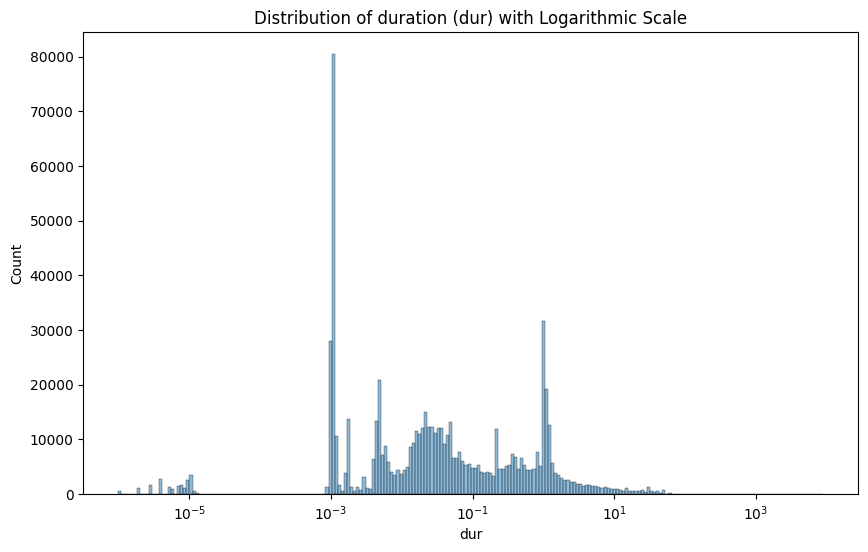

In [26]:
# Visualize the distribution of 'dur' using logarithmic scale
plt.figure(figsize=(10, 6))
sns.histplot(df['dur'], kde=True, log_scale=(True, False))  # Log scale on x-axis
plt.title('Distribution of duration (dur) with Logarithmic Scale')
plt.show()

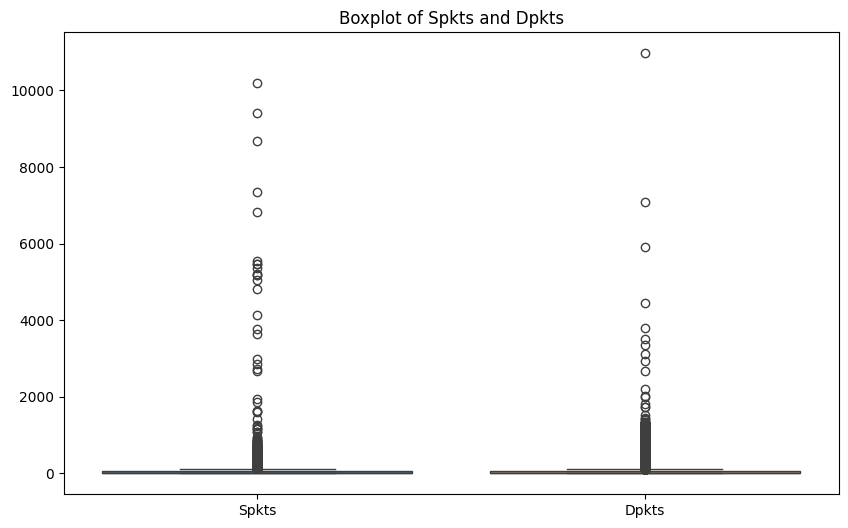

In [27]:
# Boxplots for packet count source to destination and vice-versa
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Spkts', 'Dpkts']])  # Ensure these columns exist in df
plt.title('Boxplot of Spkts and Dpkts')
plt.show()

Correlation matrix

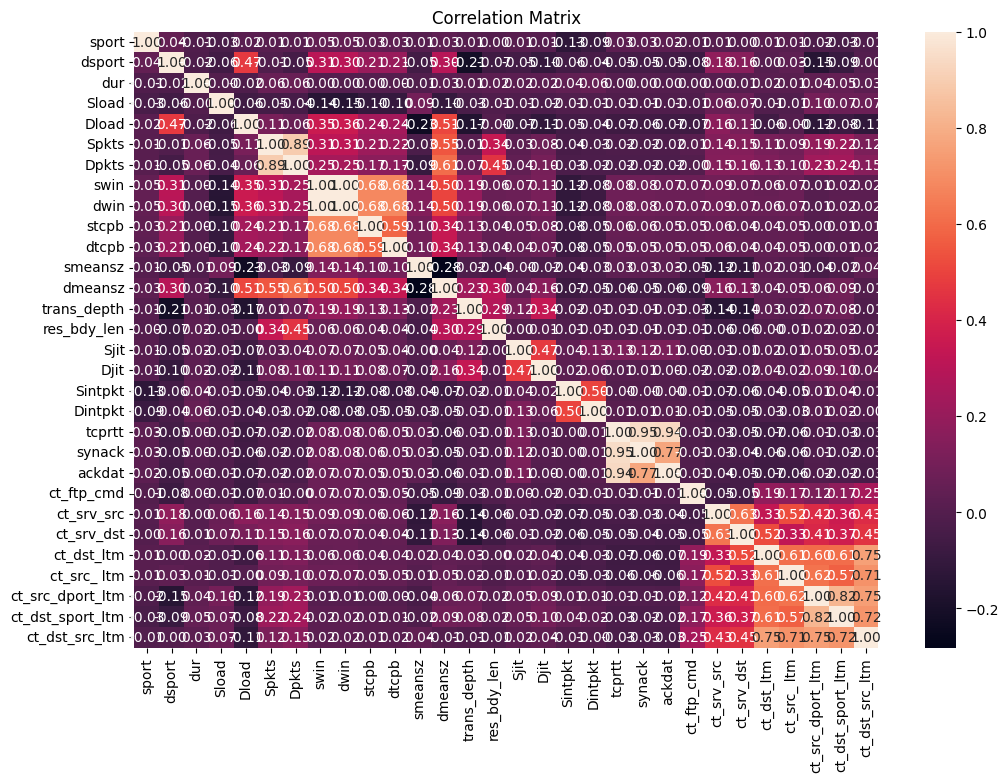

In [29]:
# Calculate correlation matrix for numeric columns only
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Scatter plot to visualize relationships

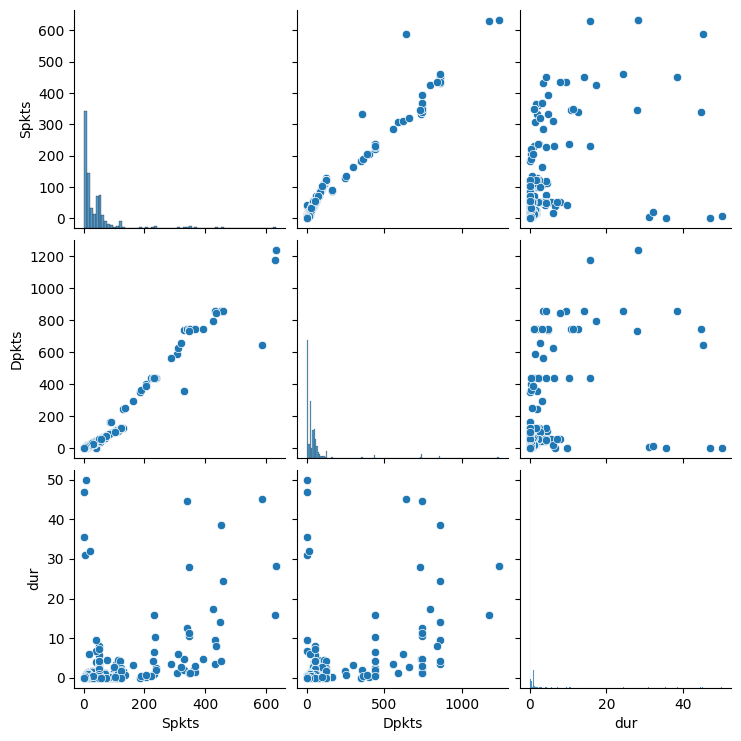

In [31]:
# Scatter plot to visualize relationships using a sample of the dataset
sample_df = numeric_df.sample(n=1000, random_state=1)
sns.pairplot(sample_df[['Spkts', 'Dpkts', 'dur']])
plt.show()

Save the final preprocessed data to a new CSV file

In [32]:
df.to_csv('/content/preprocessed_UNSW-NB15_1.csv', index=False)